The MovieLens dataset contains 1 million ratings collected from 6,000 users on 4,000 movies. It’s spread across three tables: ratings, user information, and movie information. This has been collected from users of MovieLens in the late 1990s and early 2000s. The data provides movie ratings, movie metadata (genres and year), and demographic data about the users (age, zip code, gender identification, and occupation).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
usernames = ['user_id', 'gender', 'age', 'occupation', "zip"]
users = pd.read_table('movielens/users.dat', sep="::", header=None, names=usernames, 
                      engine='python')
print(users.shape)

(6040, 5)


In [5]:
ratingnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("movielens/ratings.dat", sep="::", header=None,
                      names=ratingnames, engine="python")
ratings["rating"] = pd.to_numeric(ratings["rating"], errors='coerce')
print(ratings.shape)

(1000209, 4)


In [6]:
movienames = ['movie_id', "title", "genres"]
movies = pd.read_table("movielens/movies.dat", sep="::", header=None,
                      names=movienames, engine="python")
print(movies.shape)

(3883, 3)


In [7]:
print("First 5 rows of users:")
print(users.head())
print("Last 5 rows of users:")
print(users.tail())

First 5 rows of users:
   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455
Last 5 rows of users:
      user_id gender  age  occupation    zip
6035     6036      F   25          15  32603
6036     6037      F   45           1  76006
6037     6038      F   56           1  14706
6038     6039      F   45           0  01060
6039     6040      M   25           6  11106


In [8]:
print("First 5 rows of ratings:")
print(ratings.head())
print("Last 5 rows of ratings:")
print(ratings.tail())

First 5 rows of ratings:
   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
Last 5 rows of ratings:
         user_id  movie_id  rating  timestamp
1000204     6040      1091       1  956716541
1000205     6040      1094       5  956704887
1000206     6040       562       5  956704746
1000207     6040      1096       4  956715648
1000208     6040      1097       4  956715569


In [9]:
print("First 5 rows of movies:")
print(movies.head())
print("Last 5 rows of movies:")
print(movies.tail())

First 5 rows of movies:
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
Last 5 rows of movies:
      movie_id                       title          genres
3878      3948     Meet the Parents (2000)          Comedy
3879      3949  Requiem for a Dream (2000)           Drama
3880      3950            Tigerland (2000)           Drama
3881      3951     Two Family House (2000)           Drama
3882      3952       Contender, The (2000)  Drama|Thriller


In [10]:
users.isna().sum()

user_id       0
gender        0
age           0
occupation    0
zip           0
dtype: int64

In [11]:
ratings.isna().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [12]:
movies.isna().sum()

movie_id    0
title       0
genres      0
dtype: int64

In [13]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
print(ratings)

         user_id  movie_id  rating           timestamp
0              1      1193       5 2000-12-31 22:12:40
1              1       661       3 2000-12-31 22:35:09
2              1       914       3 2000-12-31 22:32:48
3              1      3408       4 2000-12-31 22:04:35
4              1      2355       5 2001-01-06 23:38:11
...          ...       ...     ...                 ...
1000204     6040      1091       1 2000-04-26 02:35:41
1000205     6040      1094       5 2000-04-25 23:21:27
1000206     6040       562       5 2000-04-25 23:19:06
1000207     6040      1096       4 2000-04-26 02:20:48
1000208     6040      1097       4 2000-04-26 02:19:29

[1000209 rows x 4 columns]


In [14]:
print("Total number of users who have logged:", len(ratings["user_id"].unique()))
print("Total number of movies logged:", len(ratings["movie_id"].unique()))
print("Total number of ratings logged:", len(ratings))

Total number of users who have logged: 6040
Total number of movies logged: 3706
Total number of ratings logged: 1000209


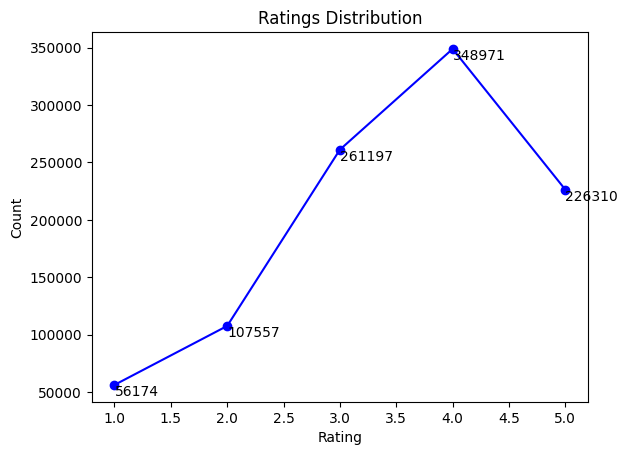

In [15]:
rating_counts = ratings['rating'].value_counts().sort_index()
# Create the line plot
plt.plot(rating_counts.index, rating_counts.values, marker='o', linestyle='-', color='b')
# Annotate each point with its value
for i, value in enumerate(rating_counts.values):
    plt.text(rating_counts.index[i], value, str(value), ha='left', va='top')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings Distribution")  
plt.show()

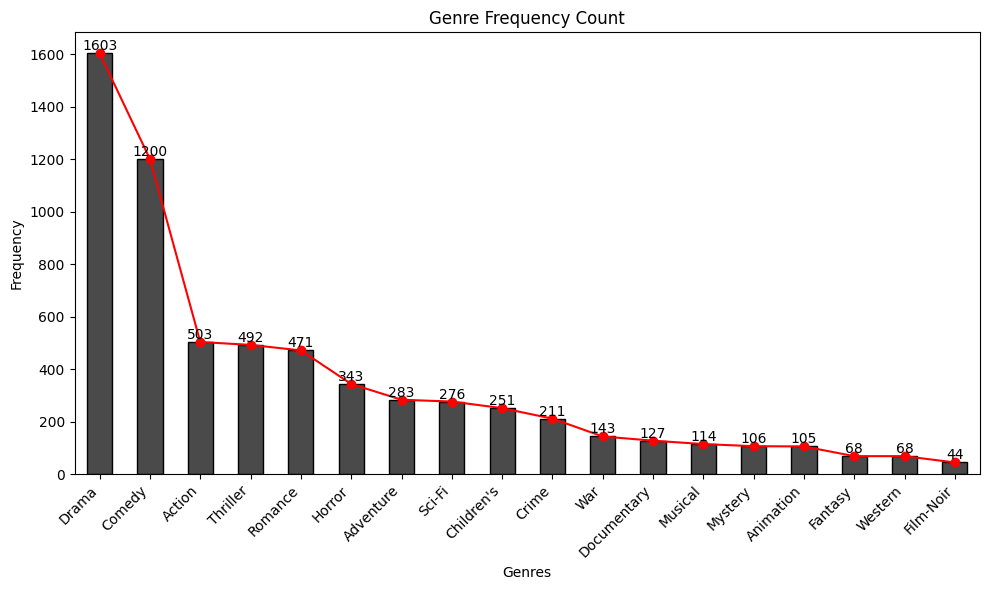

In [16]:
movies['genre_split'] = movies['genres'].str.split('|')
# Flatten the list of genres
all_genres = movies['genre_split'].explode()

# Count the frequency of each genre
genre_counts = all_genres.value_counts()

# Display the result
plt.figure(figsize=(10,6))
genre_plot = genre_counts.plot(kind='bar', color='#4A4A4A', edgecolor='black')

for bar in genre_plot.patches:
    height = bar.get_height()
    # Add text above the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.plot(genre_counts.index, genre_counts, color='red', marker='o', label='Line')

# Adding labels and title
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Genre Frequency Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [17]:
data = pd.merge(pd.merge(ratings, users), movies)
print("First 5 rows of the merged data:")
print(data.head())
print("Last 5 rows of the merged data:")
print(data.tail())
print("Shape of the merged data:")
print(data.shape)

First 5 rows of the merged data:
   user_id  movie_id  rating           timestamp gender  age  occupation  \
0        1      1193       5 2000-12-31 22:12:40      F    1          10   
1        1       661       3 2000-12-31 22:35:09      F    1          10   
2        1       914       3 2000-12-31 22:32:48      F    1          10   
3        1      3408       4 2000-12-31 22:04:35      F    1          10   
4        1      2355       5 2001-01-06 23:38:11      F    1          10   

     zip                                   title  \
0  48067  One Flew Over the Cuckoo's Nest (1975)   
1  48067        James and the Giant Peach (1996)   
2  48067                     My Fair Lady (1964)   
3  48067                  Erin Brockovich (2000)   
4  48067                    Bug's Life, A (1998)   

                         genres                       genre_split  
0                         Drama                           [Drama]  
1  Animation|Children's|Musical  [Animation, Children's, Musi

In [18]:
print("Log of user with id 1:")
data.loc[data['user_id'] == 1, ['title', 'rating']]

Log of user with id 1:


,title,rating
0,One Flew Over the Cuckoo's Nest (1975),5
1,James and the Giant Peach (1996),3
2,My Fair Lady (1964),3
3,Erin Brockovich (2000),4
4,"Bug's Life, A (1998)",5
5,"Princess Bride, The (1987)",3
6,Ben-Hur (1959),5
7,"Christmas Story, A (1983)",5
8,Snow White and the Seven Dwarfs (1937),4
9,"Wizard of Oz, The (1939)",4


In [19]:
print("Median rating:", data["rating"].median())
print("Most frequent rating:", data["rating"].mode())
print("Deviation of ratings:", data["rating"].std())

Median rating: 4.0
Most frequent rating: 0    4
Name: rating, dtype: int64
Deviation of ratings: 1.117101845373258


In [20]:
sorted_data = data.sort_values("rating", ascending=False)
print("Top 25 movies:")
print(sorted_data[['title','rating','genre_split']].head(25))

Top 25 movies:
                                               title  rating  \
0             One Flew Over the Cuckoo's Nest (1975)       5   
241580                   Boat, The (Das Boot) (1981)       5   
241592                                  Glory (1989)       5   
679613                           Animal House (1978)       5   
241588             E.T. the Extra-Terrestrial (1982)       5   
241587           Truth About Cats & Dogs, The (1996)       5   
241584                       Crying Game, The (1992)       5   
241581                                Platoon (1986)       5   
241579                       Right Stuff, The (1983)       5   
241595                                Robocop (1987)       5   
679622                            Dersu Uzala (1974)       5   
241575                              Girlfight (2000)       5   
241573                        Beautiful Girls (1996)       5   
241572                              Tombstone (1993)       5   
241571                   

In [21]:
print("Bottom 25 movies:")
print(sorted_data[['title','rating','genre_split']].tail(25))

Bottom 25 movies:
                                             title  rating  \
36246                         Young Guns II (1990)       1   
114321                  Remember the Titans (2000)       1   
647278                             Jaws 3-D (1983)       1   
576809                      Allnighter, The (1987)       1   
159462        Prom Night III: The Last Kiss (1989)       1   
342622                 Horse Whisperer, The (1998)       1   
159466                            Airplane! (1980)       1   
159467              Airplane II: The Sequel (1982)       1   
576805                        Meatballs III (1987)       1   
576804                    Meatballs Part II (1984)       1   
36239       Star Trek V: The Final Frontier (1989)       1   
576803                Pink Floyd - The Wall (1982)       1   
159468  Prom Night IV: Deliver Us From Evil (1992)       1   
291202       Texas Chainsaw Massacre 2, The (1986)       1   
159472                       Child's Play 3 (1992)  

In [22]:
subset = data[['title', 'rating', 'gender']]
subset.head()

,title,rating,gender
0,One Flew Over the Cuckoo's Nest (1975),5,F
1,James and the Giant Peach (1996),3,F
2,My Fair Lady (1964),3,F
3,Erin Brockovich (2000),4,F
4,"Bug's Life, A (1998)",5,F


In [23]:
mean_ratings = subset.groupby(['title','gender'])['rating'].mean().unstack()
print(mean_ratings)

gender                                             F         M
title                                                         
$1,000,000 Duck (1971)                      3.375000  2.761905
'Night Mother (1986)                        3.388889  3.352941
'Til There Was You (1997)                   2.675676  2.733333
'burbs, The (1989)                          2.793478  2.962085
...And Justice for All (1979)               3.828571  3.689024
...                                              ...       ...
Zed & Two Noughts, A (1985)                 3.500000  3.380952
Zero Effect (1998)                          3.864407  3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995)       NaN  3.500000
Zeus and Roxanne (1997)                     2.777778  2.357143
eXistenZ (1999)                             3.098592  3.289086

[3706 rows x 2 columns]


In [24]:
ratings_by_title = data.groupby('title').size()
ratings_by_title = ratings_by_title.sort_values(ascending=False)
ratings_by_title.head(10)

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

In [25]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Bicycle Thief, The (Ladri di biciclette) (1948)',
       'Take the Money and Run (1969)', 'Bachelor, The (1999)',
       'Man Who Knew Too Little, The (1997)',
       'Wes Craven's New Nightmare (1994)', 'Presidio, The (1988)',
       'Top Hat (1935)',
       'Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)',
       'U Turn (1997)', 'Random Hearts (1999)'],
      dtype='object', name='title', length=1216)

In [26]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
"Presidio, The (1988)",3.547619,3.253589
Top Hat (1935),4.245763,4.060150
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991),2.152174,2.121951


In [27]:
len(mean_ratings.loc[mean_ratings['F'].isnull(), :].index.unique())

0

In [28]:
mean_ratings.sort_values(by='F', ascending=False).head(10)

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [29]:
mean_ratings.sort_values(by='M', ascending=False).head(10)

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


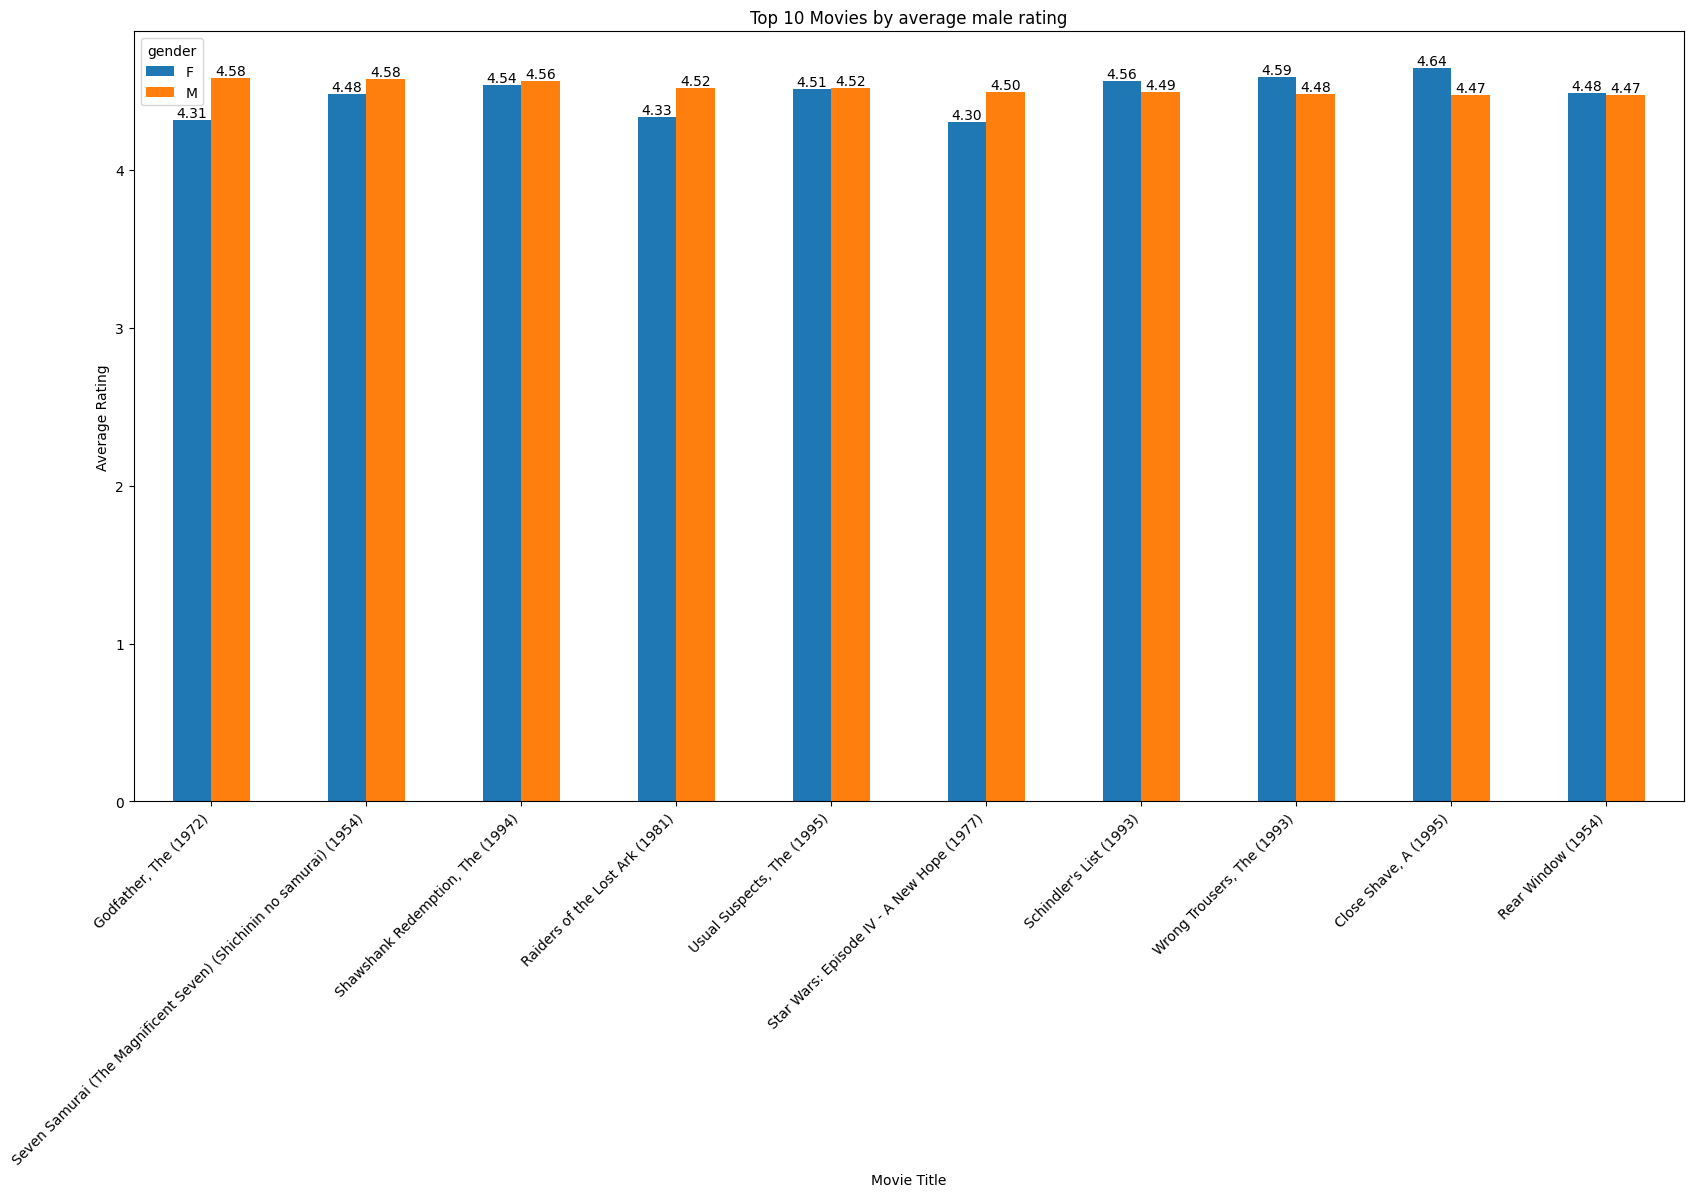

In [30]:
mean_ratings_male = mean_ratings.sort_values(by='M', ascending=False).head(10)
ratings_plot_by_male = mean_ratings_male.plot(kind='bar', figsize=(20, 10))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.title("Top 10 Movies by average male rating")
for bar in ratings_plot_by_male.patches:
    height = bar.get_height()
    # Add text above the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        height,  # Y position (bar height)
        f'{height:.2f}',  # Format height to 2 decimal places
        ha='center', va='bottom'  # Align text
    )

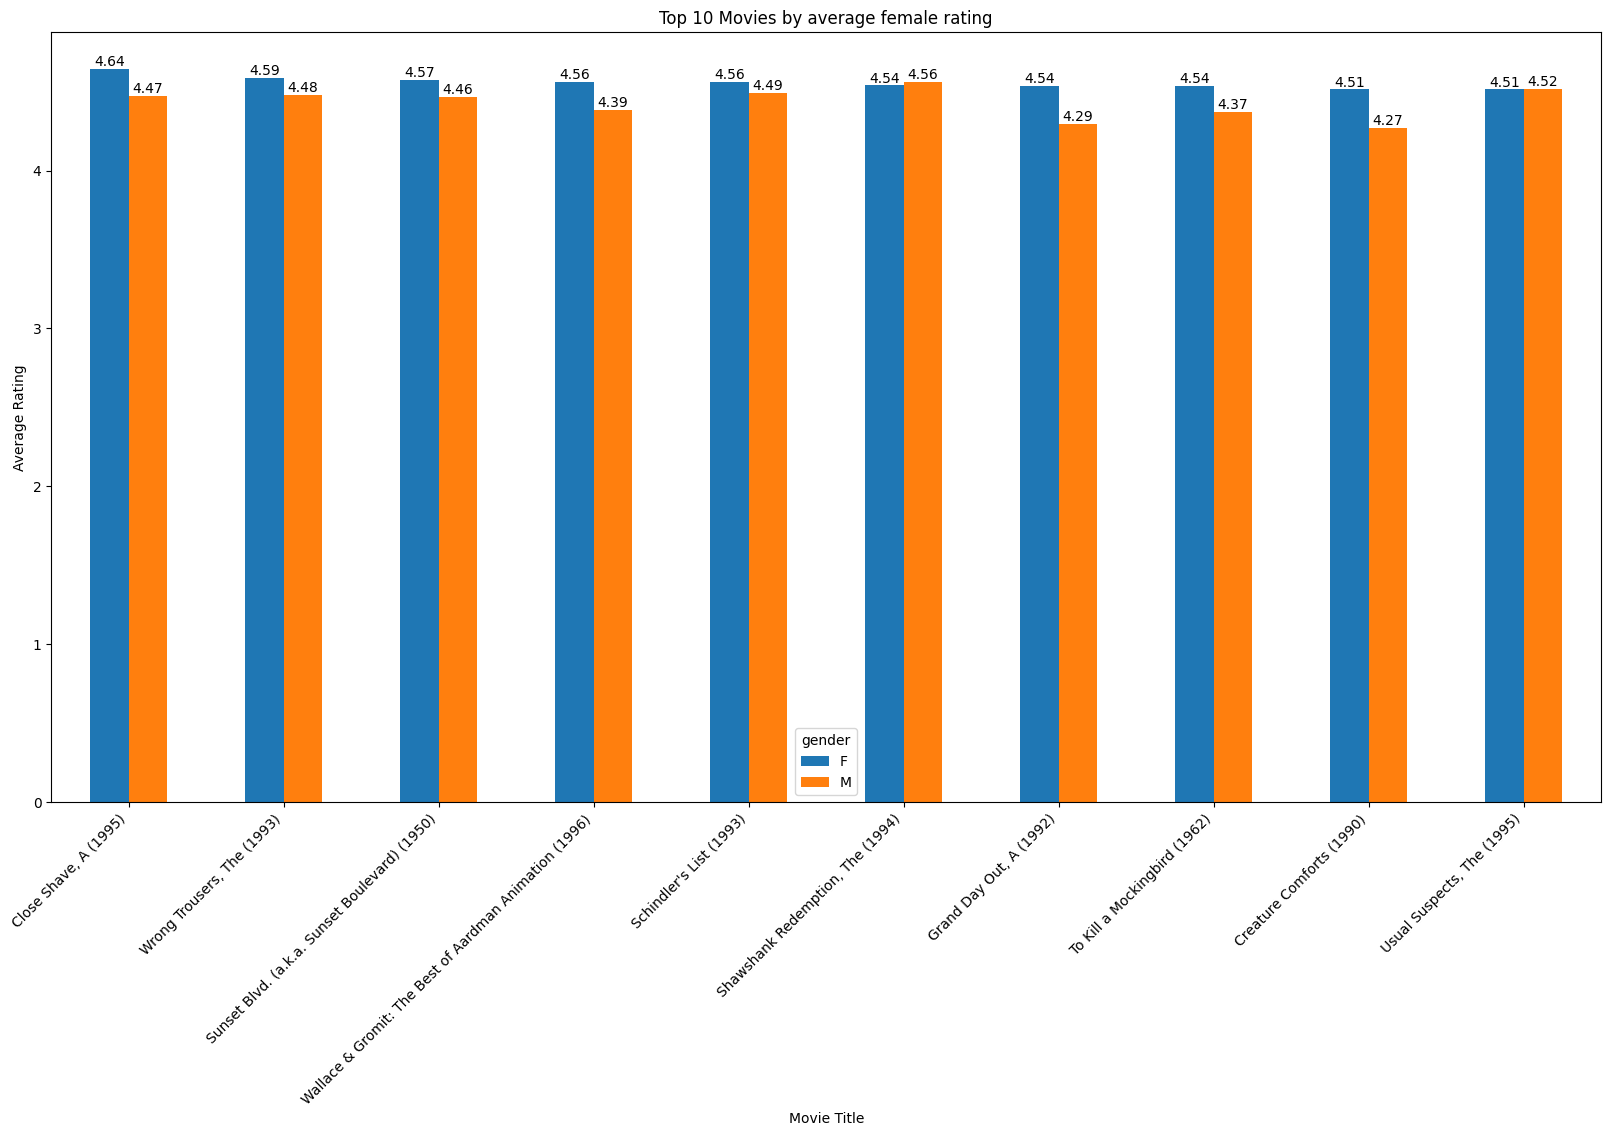

In [31]:
mean_ratings_female = mean_ratings.sort_values(by='F', ascending=False).head(10)
ratings_plot_by_female = mean_ratings_female.plot(kind='bar', figsize=(20, 10))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.title("Top 10 Movies by average female rating")
for bar in ratings_plot_by_female.patches:
    height = bar.get_height()
    # Add text above the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        height,  # Y position (bar height)
        f'{height:.2f}',  # Format height to 2 decimal places
        ha='center', va='bottom'  # Align text
    )

In [32]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_diff = mean_ratings.sort_values(by='diff')
print(sorted_diff)

gender                                         F         M      diff
title                                                               
Dirty Dancing (1987)                    3.790378  2.959596 -0.830782
Jumpin' Jack Flash (1986)               3.254717  2.578358 -0.676359
Grease (1978)                           3.975265  3.367041 -0.608224
Little Women (1994)                     3.870588  3.321739 -0.548849
Steel Magnolias (1989)                  3.901734  3.365957 -0.535777
...                                          ...       ...       ...
Cable Guy, The (1996)                   2.250000  2.863787  0.613787
Longest Day, The (1962)                 3.411765  4.031447  0.619682
Dumb & Dumber (1994)                    2.697987  3.336595  0.638608
Kentucky Fried Movie, The (1977)        2.878788  3.555147  0.676359
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300  0.726351

[1216 rows x 3 columns]


In [33]:
sorted_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


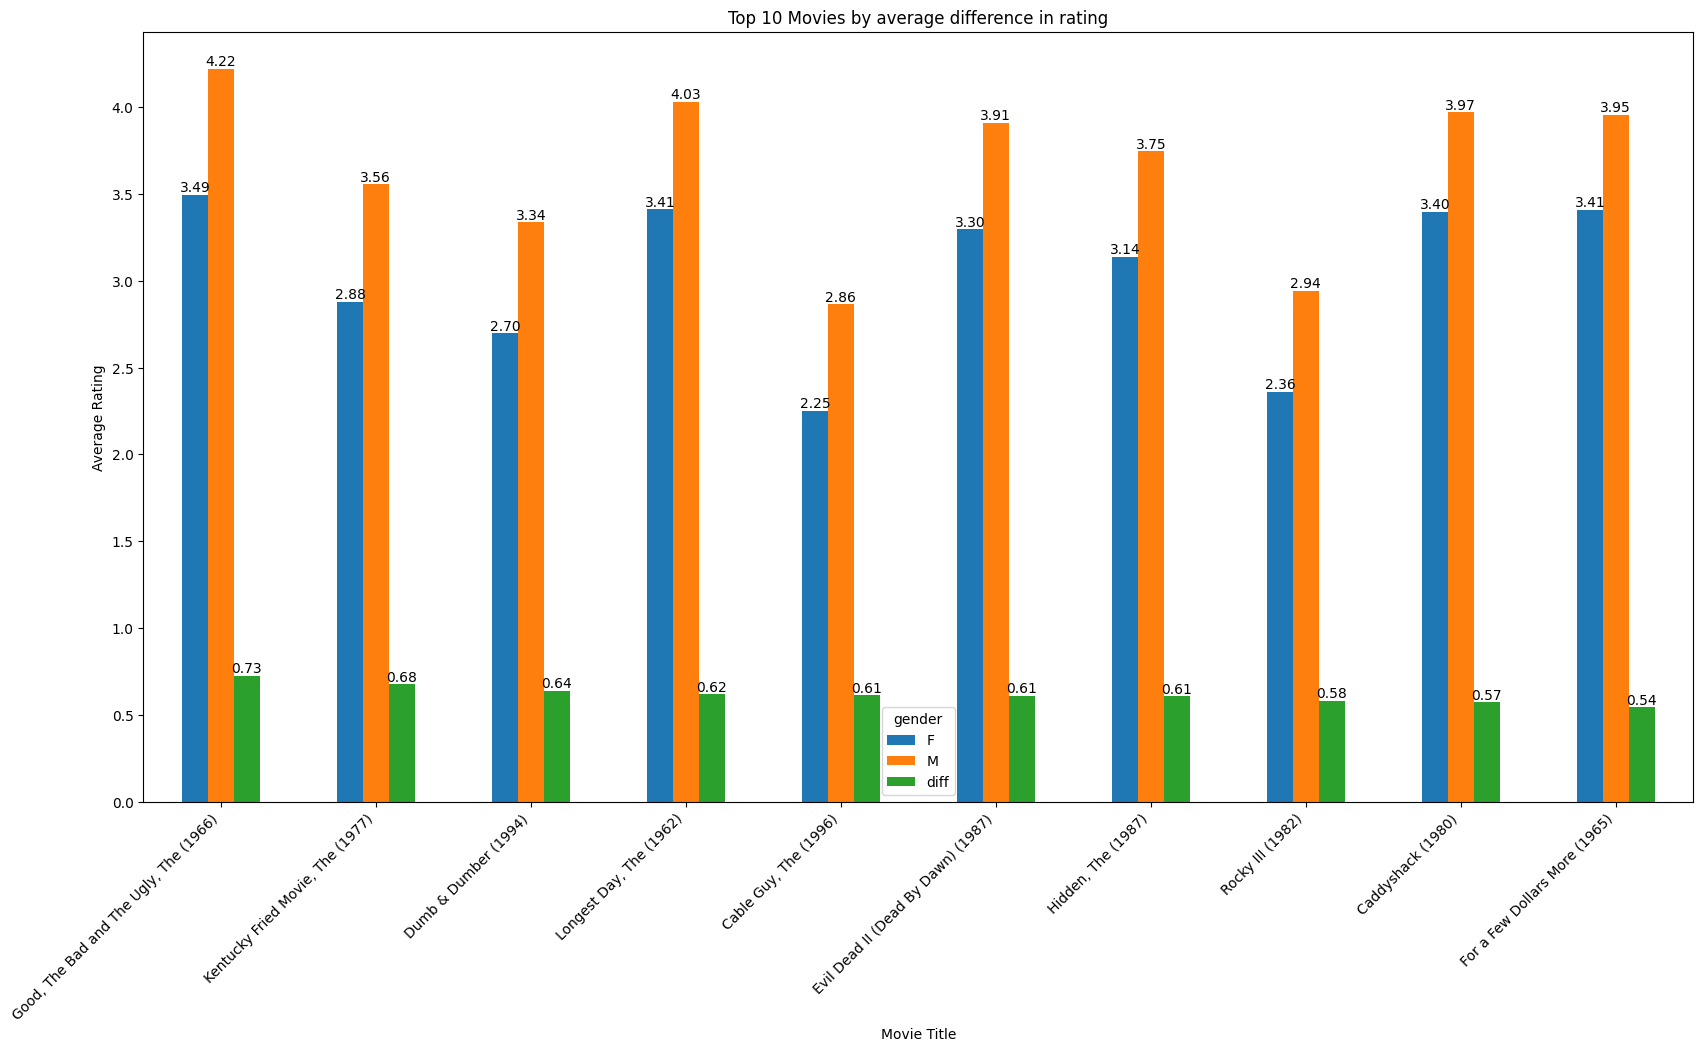

In [34]:
mean_ratings_diff = mean_ratings.sort_values(by='diff', ascending=False).head(10)
ratings_plot_by_diff = mean_ratings_diff.plot(kind='bar', figsize=(20, 10))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.title("Top 10 Movies by average difference in rating")
for bar in ratings_plot_by_diff.patches:
    height = bar.get_height()
    # Add text above the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        height,  # Y position (bar height)
        f'{height:.2f}',  # Format height to 2 decimal places
        ha='center', va='bottom'  # Align text
    )

The disagreement between user ratings can be measured by calculating the standard deviation of the ratings

In [36]:
rating_std_by_title = data.groupby("title")['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title = rating_std_by_title.sort_values(ascending=False)
rating_std_by_title.head(10)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64